In [73]:
import pandas as pd
import numpy as np

In [130]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [131]:
dupl_columns = list(diabetes.columns)
diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
diabetes_dedupped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0,Female
764,1,96,122,0,0,22.4,0.207,27,0,Female
765,10,101,86,37,0,45.6,1.136,38,1,Female
766,0,141,0,0,0,42.4,0.205,29,1,Female


In [132]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [133]:
diabetes_cleaned = diabetes_dedupped.drop(low_information_cols, axis=1)
diabetes_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [134]:
nan_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in nan_columns:
    diabetes_cleaned[col] = diabetes_cleaned[col].apply(lambda x: np.nan if x == 0 else x)
    

In [140]:
diabetes_cleaned.isnull().mean().sort_values(ascending=False)

SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [138]:
diabetes_cleaned = diabetes_cleaned.drop('Insulin', axis=1)

In [139]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [141]:
m = diabetes_cleaned.shape[1]
m

8

In [142]:
m = diabetes_cleaned.shape[1]
diabetes_cleaned = diabetes_cleaned.dropna(how='any', axis=0, thresh=m-2)
diabetes_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


Задание 8.6 В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [143]:
diabetes_cleaned.isnull().mean().sort_values(ascending=False)

SkinThickness               0.289093
BloodPressure               0.036794
Glucose                     0.006570
BMI                         0.005256
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [144]:
values = {
    'SkinThickness': diabetes_cleaned['SkinThickness'].median(),
    'BloodPressure': diabetes_cleaned['BloodPressure'].median(),
    'Glucose': diabetes_cleaned['Glucose'].median(),
    'BMI': diabetes_cleaned['BMI'].median()
}
#заполняем оставшиеся записи константами в соответствии со словарем values
diabetes_cleaned = diabetes_cleaned.fillna(values)

In [145]:
diabetes_cleaned['SkinThickness'].mean()

29.109067017082786

8.7 Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [163]:
def outliers_iqr(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [148]:
outliers, cleaned = outliers_iqr(diabetes_cleaned, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [158]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [152]:
outliers, cleaned = outliers_z_score(diabetes_cleaned, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


8.9 На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

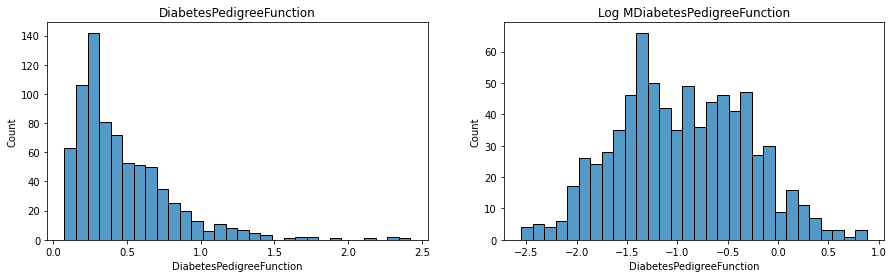

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(diabetes_cleaned['DiabetesPedigreeFunction'], bins=30, ax=axes[0])
histplot.set_title('DiabetesPedigreeFunction');

#гистограмма в логарифмическом масштабе
log_DPF = np.log(diabetes_cleaned['DiabetesPedigreeFunction'])
histplot = sns.histplot(log_DPF, bins=30, ax=axes[1])
histplot.set_title('Log MDiabetesPedigreeFunction');

In [165]:
outliers, cleaned = outliers_iqr(diabetes_cleaned, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
a = outliers.shape[0]

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [166]:
outliers, cleaned = outliers_iqr(diabetes_cleaned, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
b = outliers.shape[0]

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


In [167]:
a - b

29